In [44]:
## Import
# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
import numpy as np
import h5py
import pandas as pd

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
from models.data import *

In [4]:
df = load_dataset_as_dataframe('data/2016-04-21--14-48-08.h5')
df.head()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.475421,-0.181464,...,799.000000,4075.000000,4083.000000,114.000000,790.000000,15.000000,68.000000,144.000000,20.000000,8.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.479014,-0.189644,...,770.027548,4075.000000,4073.040720,117.621556,774.608385,10.473054,79.432335,146.000000,23.094611,7.094611
2,0.0,0.0,0.0,0.0,0.0,0.0,0.118651,0.0,0.474154,-0.165003,...,810.689515,4073.179604,4077.461189,118.910198,804.856938,13.640793,74.077621,145.089802,22.089802,7.910198
3,4.0,0.0,0.0,0.0,0.0,0.0,0.431230,0.0,0.472352,-0.152852,...,784.150766,4074.745230,4077.000000,116.000000,775.000000,13.000000,63.000000,145.000000,22.000000,6.000000
4,4.0,0.0,0.0,0.0,0.0,0.0,0.743808,0.0,0.462913,-0.141036,...,775.000000,4077.000000,4058.000000,118.000000,779.000000,6.000000,88.000000,144.000000,22.453502,6.907004


In [31]:
df1 = load_dataset_as_dataframe('data/2016-01-30--11-24-51.h5')
df1.head()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.313100,-0.047527,...,28.000000,228.000000,3.000000,236.000000,14.000000,22.000000,90.000000,250.000000,31.000000,17.000000
1,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.619745,-0.111516,...,23.074187,226.358062,3.000000,236.820969,18.925813,19.537094,99.851625,247.537094,35.925813,15.358062
2,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.589704,-0.088468,...,23.134382,228.798428,232.471064,236.798428,20.865618,18.865618,116.134382,246.134382,34.000000,14.932809
3,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.594371,-0.097445,...,25.895667,231.895667,252.860890,236.034778,18.104333,15.069555,121.069555,250.000000,33.034778,12.965222
4,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.612610,-0.128938,...,23.229115,226.458231,25.787456,236.000000,21.694513,15.923628,126.778052,247.152744,34.229115,13.000000


In [6]:
sample = df[:300000]

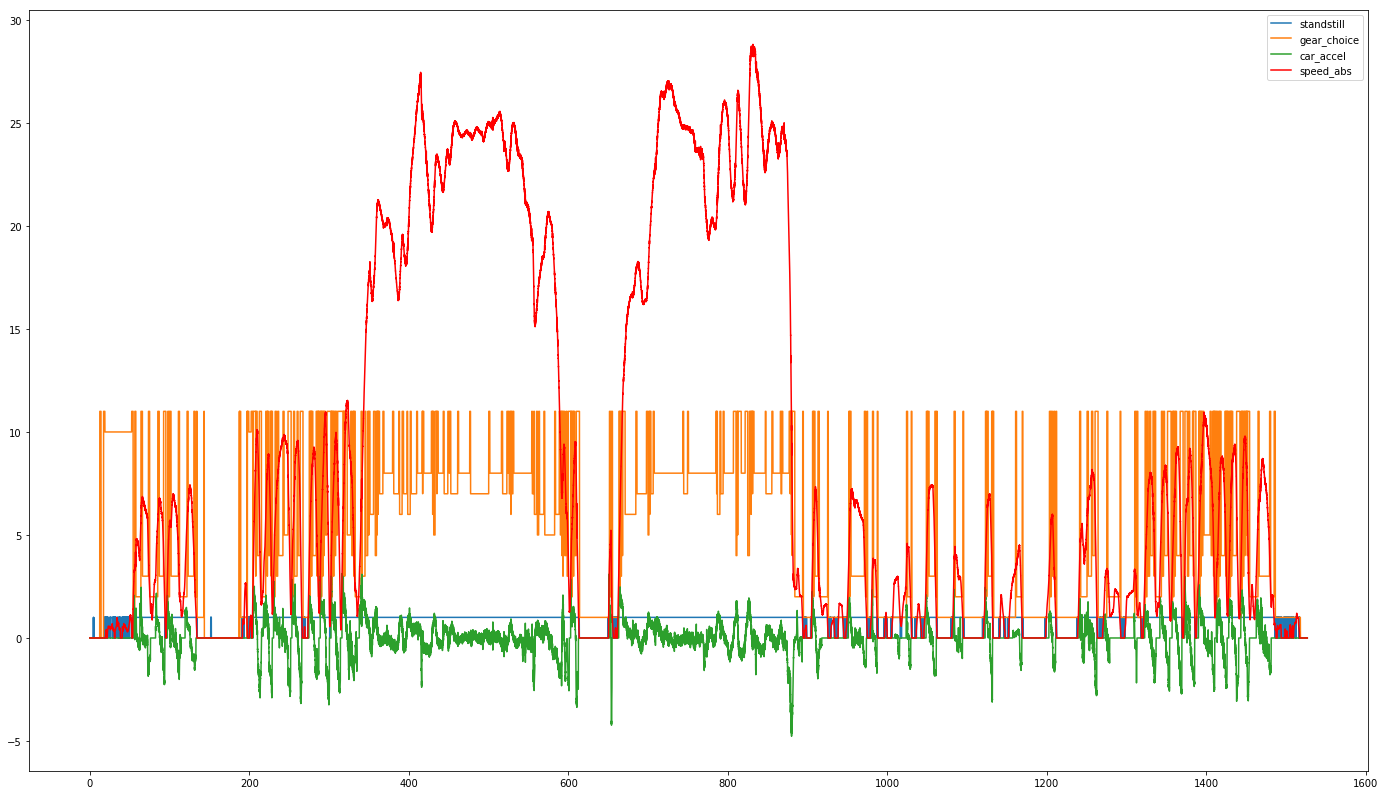

In [7]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times, sample.standstill)
plt.plot(sample.times, sample.gear_choice)
plt.plot(sample.times, sample.car_accel)
plt.plot(sample.times, sample.speed_abs, c='r')
plt.legend()

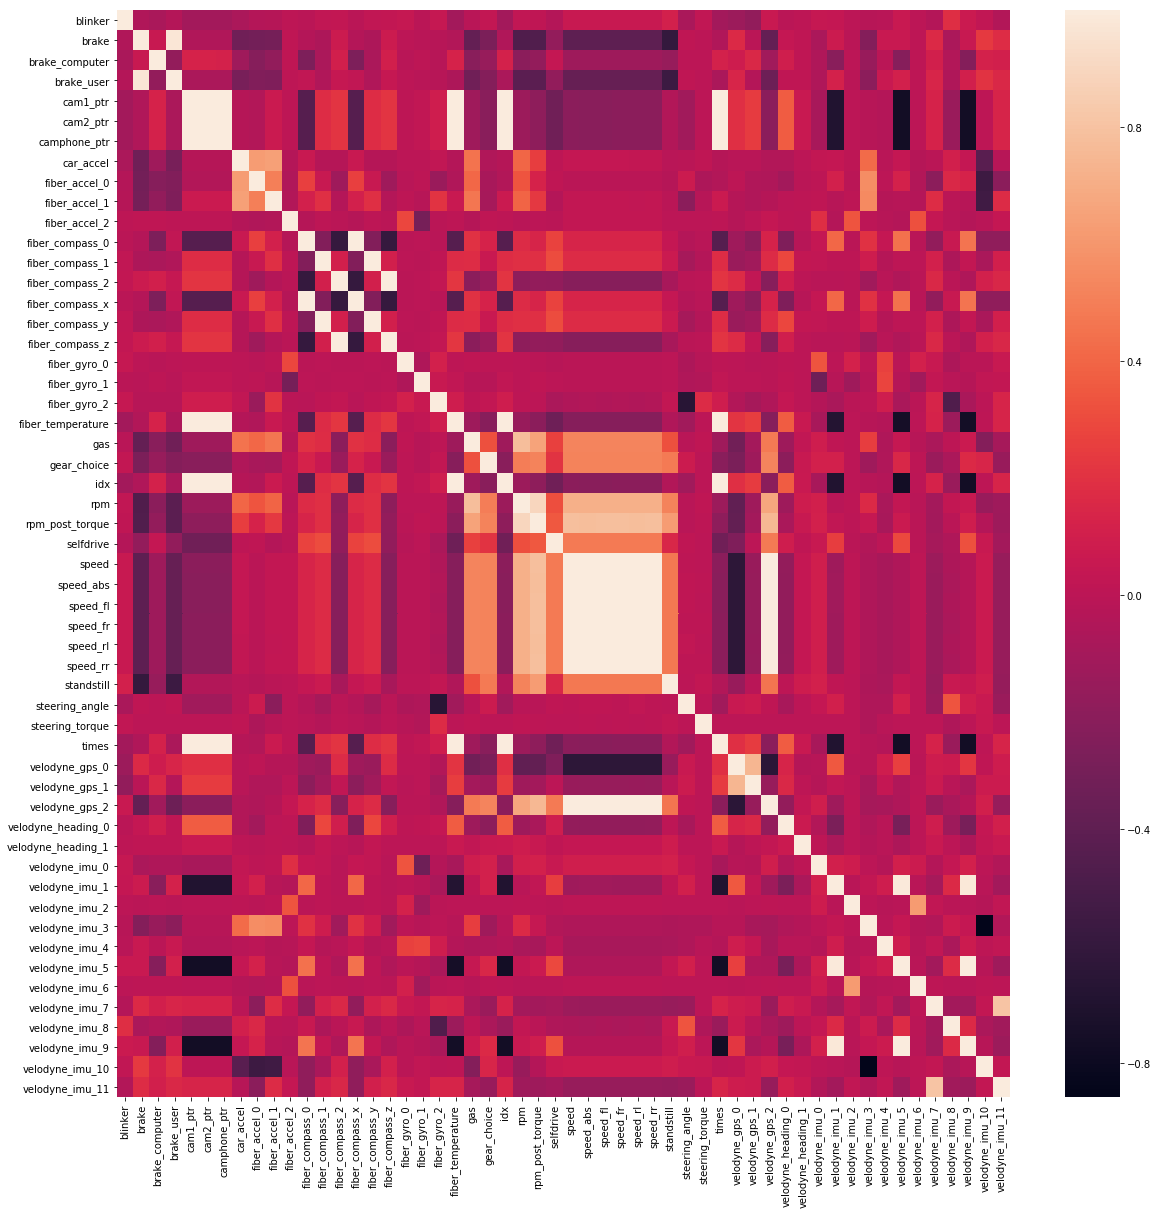

In [233]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr())

In [234]:
df.describe()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
count,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,...,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000,152650.000000
mean,6.750056,334.631547,42.549672,292.081876,15267.822692,15263.352257,22772.098800,-0.021006,0.347880,0.073085,...,791.590508,2648.786666,3248.286779,89.853978,785.715461,2622.346940,131.161414,117.259951,1399.422894,2717.659633
std,11.865961,574.526626,127.024387,582.237325,8816.092826,8812.799096,13147.861501,0.753241,0.789844,0.820005,...,92.955738,1762.932573,1462.562746,15.900711,97.968634,1778.760707,433.119131,16.106536,1748.419969,1751.530112
min,0.000000,-64.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,-4.767932,-6.995340,-7.204732,...,14.000000,0.000000,0.000000,67.181092,3.032728,0.000000,0.000000,93.284157,0.000000,0.000000
25%,4.000000,0.000000,0.000000,0.000000,7633.000000,7631.000000,11385.833086,-0.133633,-0.060611,-0.261019,...,775.057144,194.936731,2984.809857,76.866891,769.000000,152.948102,70.227796,103.753251,54.712443,312.822983
50%,4.000000,0.000000,0.000000,0.000000,15268.000000,15263.500000,22772.194300,0.000000,0.360794,0.062531,...,791.497354,3941.999663,4074.000000,84.825126,785.660045,3990.541702,79.026304,112.272861,145.640377,4012.600483
75%,4.000000,456.721363,0.000000,246.301098,22903.000000,22895.000000,34158.372334,0.127648,0.815764,0.512484,...,806.534982,4039.076691,4083.584130,107.000000,801.495759,4069.710823,87.975381,135.000000,3870.675882,4069.543018
max,68.000000,3856.000000,614.000000,3856.000000,30537.000000,30527.000000,45544.000000,3.125285,10.553655,9.266323,...,4081.000000,4095.000000,4095.000000,122.007321,4094.000000,4095.000000,4095.000000,148.000000,4095.000000,4095.000000


In [236]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152650 entries, 0 to 152649
Data columns (total 54 columns):
blinker               152650 non-null float64
brake                 152650 non-null float64
brake_computer        152650 non-null float64
brake_user            152650 non-null float64
cam1_ptr              152650 non-null float64
cam2_ptr              152650 non-null float64
camphone_ptr          152650 non-null float64
car_accel             152650 non-null float64
fiber_accel_0         152650 non-null float64
fiber_accel_1         152650 non-null float64
fiber_accel_2         152650 non-null float64
fiber_compass_0       152650 non-null float64
fiber_compass_1       152650 non-null float64
fiber_compass_2       152650 non-null float64
fiber_compass_x       152650 non-null float64
fiber_compass_y       152650 non-null float64
fiber_compass_z       152650 non-null float64
fiber_gyro_0          152650 non-null float64
fiber_gyro_1          152650 non-null float64
fiber_gyro_2   

In [237]:
df.isna().sum()

blinker               0
brake                 0
brake_computer        0
brake_user            0
cam1_ptr              0
cam2_ptr              0
camphone_ptr          0
car_accel             0
fiber_accel_0         0
fiber_accel_1         0
fiber_accel_2         0
fiber_compass_0       0
fiber_compass_1       0
fiber_compass_2       0
fiber_compass_x       0
fiber_compass_y       0
fiber_compass_z       0
fiber_gyro_0          0
fiber_gyro_1          0
fiber_gyro_2          0
fiber_temperature     0
gas                   0
gear_choice           0
idx                   0
rpm                   0
rpm_post_torque       0
selfdrive             0
speed                 0
speed_abs             0
speed_fl              0
speed_fr              0
speed_rl              0
speed_rr              0
standstill            0
steering_angle        0
steering_torque       0
times                 0
velodyne_gps_0        0
velodyne_gps_1        0
velodyne_gps_2        0
velodyne_heading_0    0
velodyne_heading

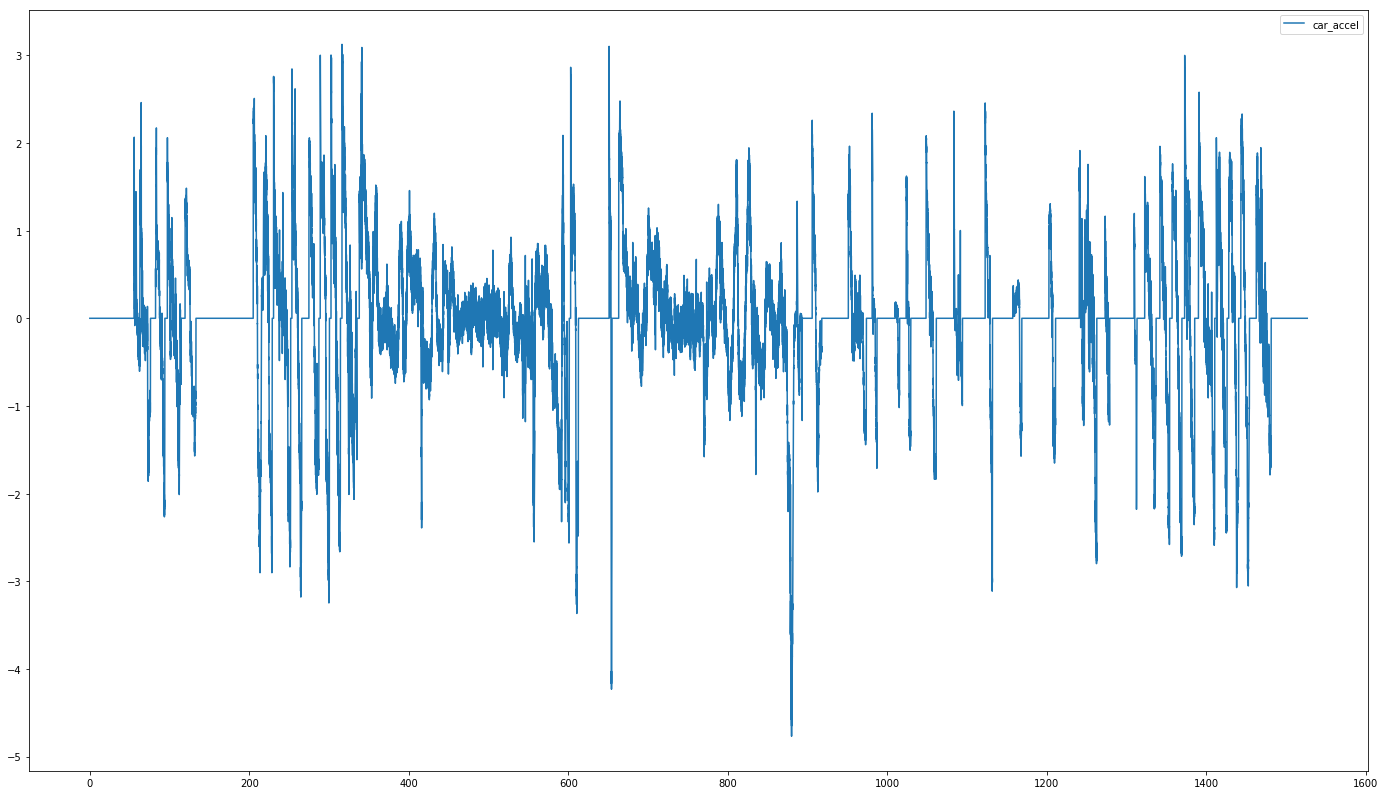

In [238]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times, sample.car_accel)
plt.legend()

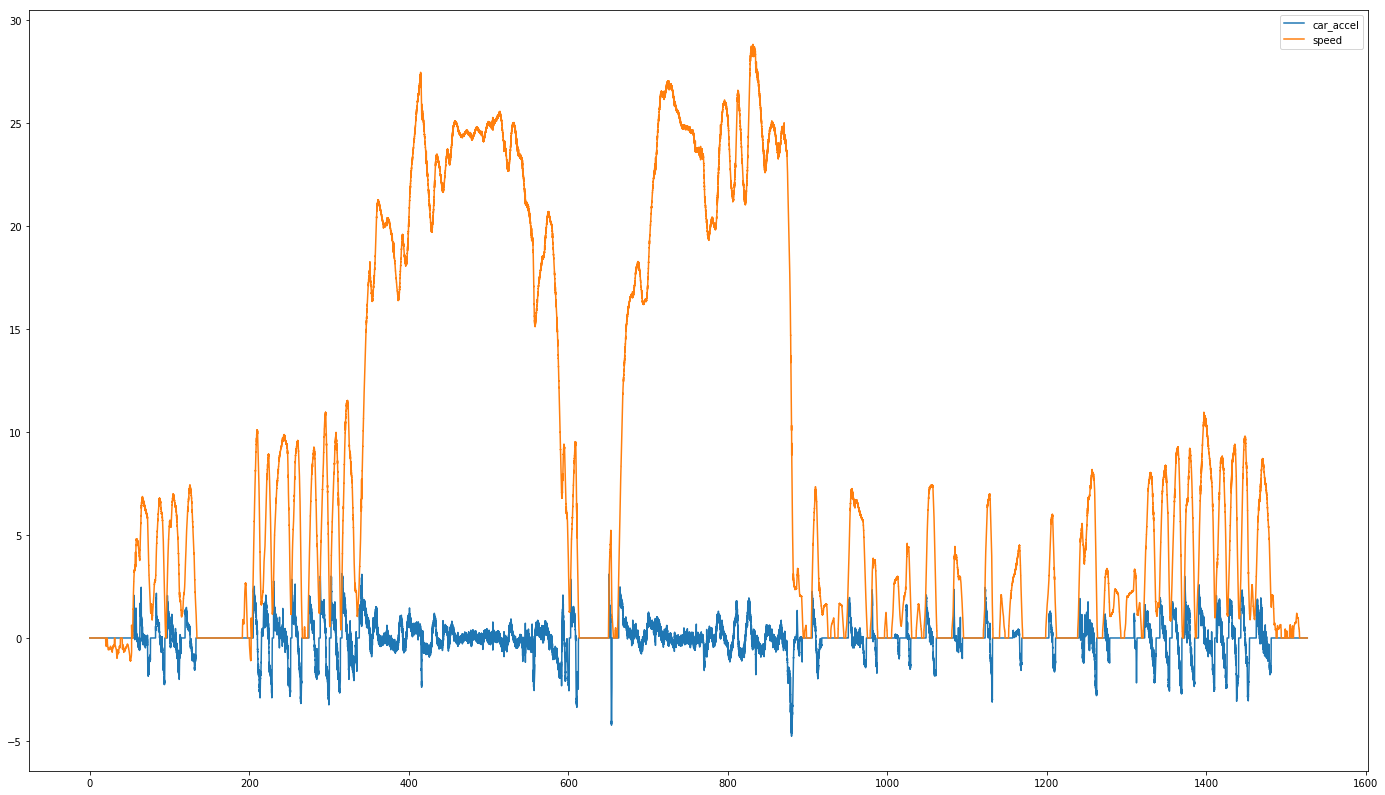

In [14]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times[limits[0]:limits[1]], sample.car_accel[limits[0]:limits[1]])
plt.plot(sample.times[limits[0]:limits[1]], sample.speed[limits[0]:limits[1]])
plt.legend()

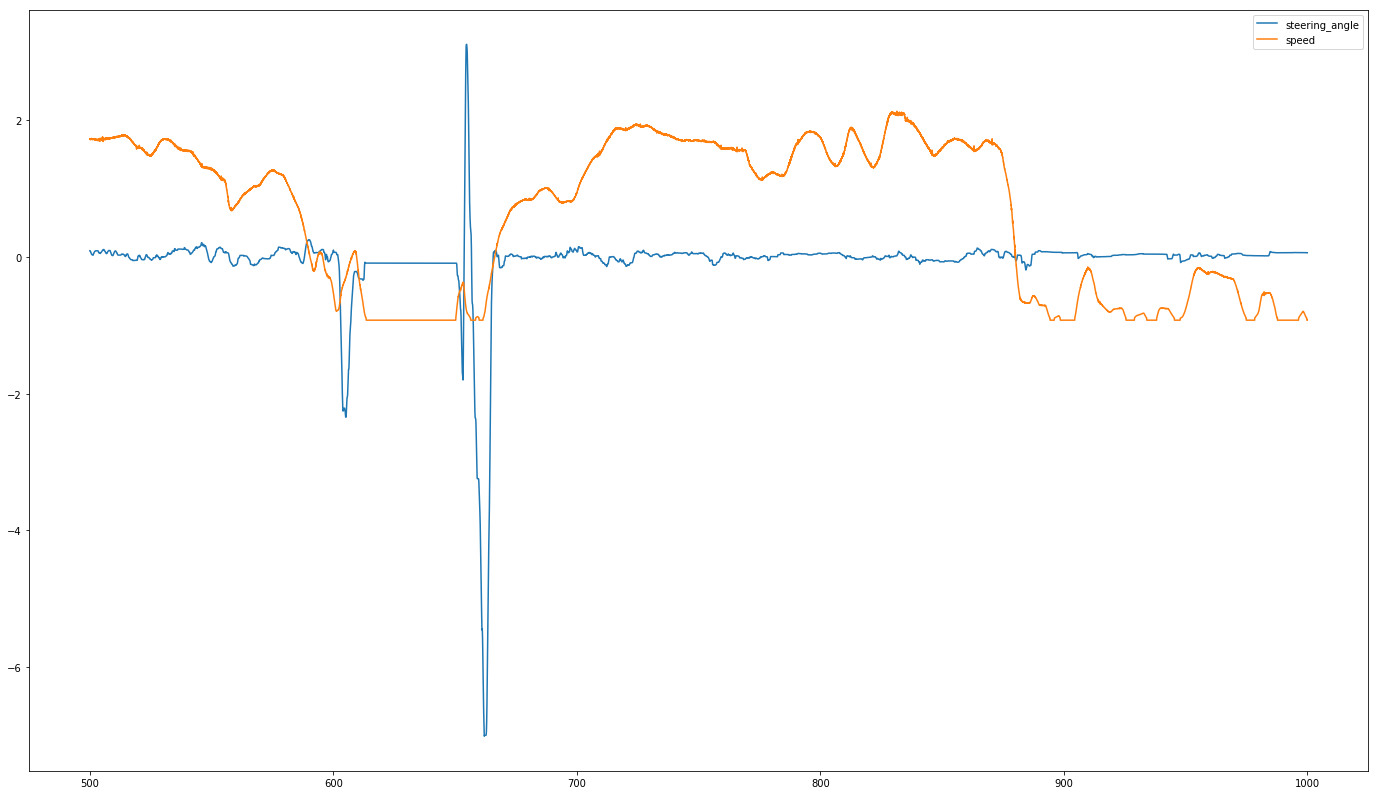

In [248]:
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(sample.times[50000:100000], (sample.steering_angle[50000:100000] - sample.steering_angle.mean()) / sample.steering_angle.std())
plt.plot(sample.times[50000:100000], (sample.speed[50000:100000] - sample.speed.mean()) / sample.speed.std())
plt.legend()

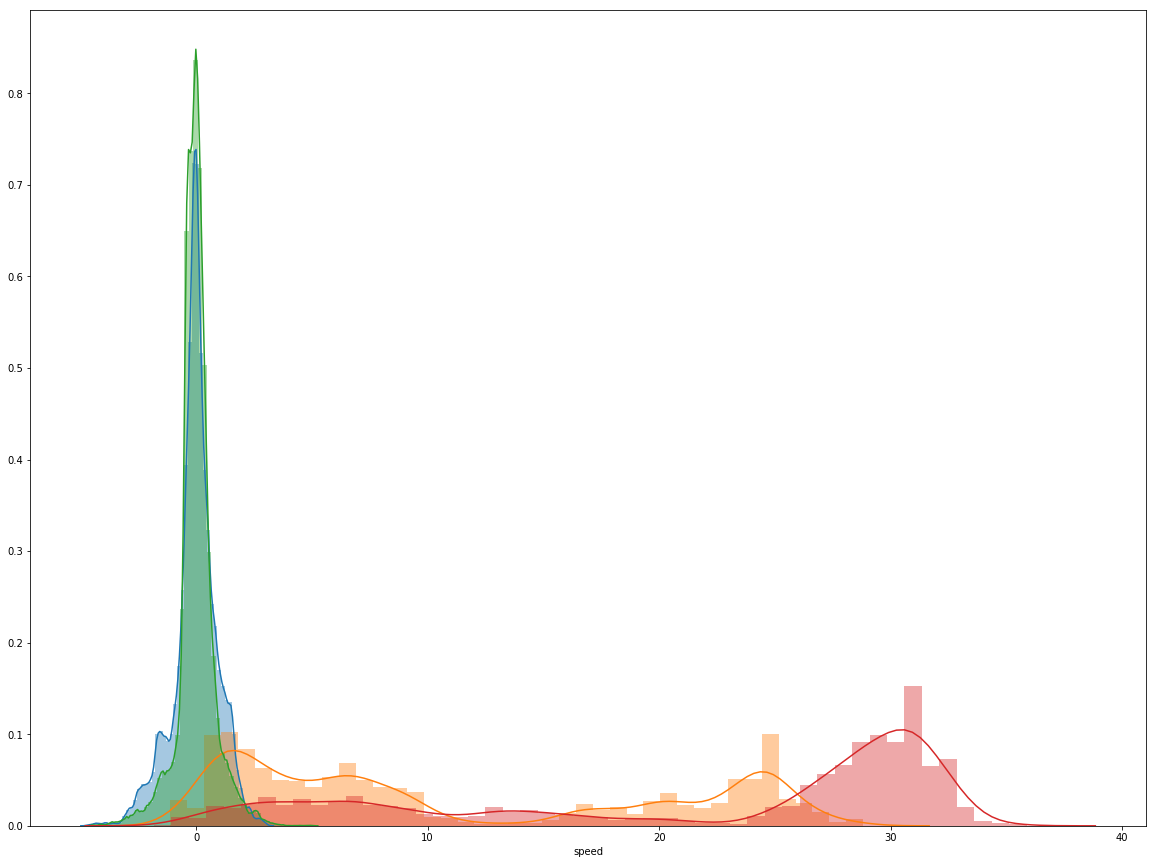

In [32]:
# Plot acceleration distribution without null values
accel_no_zero = df.car_accel[df.car_accel !=0]
speed_no_zero = df.speed[df.speed !=0]
accel_no_zero_1 = df1.car_accel[df1.car_accel !=0]
speed_no_zero_1 = df1.speed[df1.speed !=0]
plt.figure(figsize=(20,15))
sns.distplot(a=accel_no_zero)
sns.distplot(a=speed_no_zero)
sns.distplot(a=accel_no_zero_1)
sns.distplot(a=speed_no_zero_1)

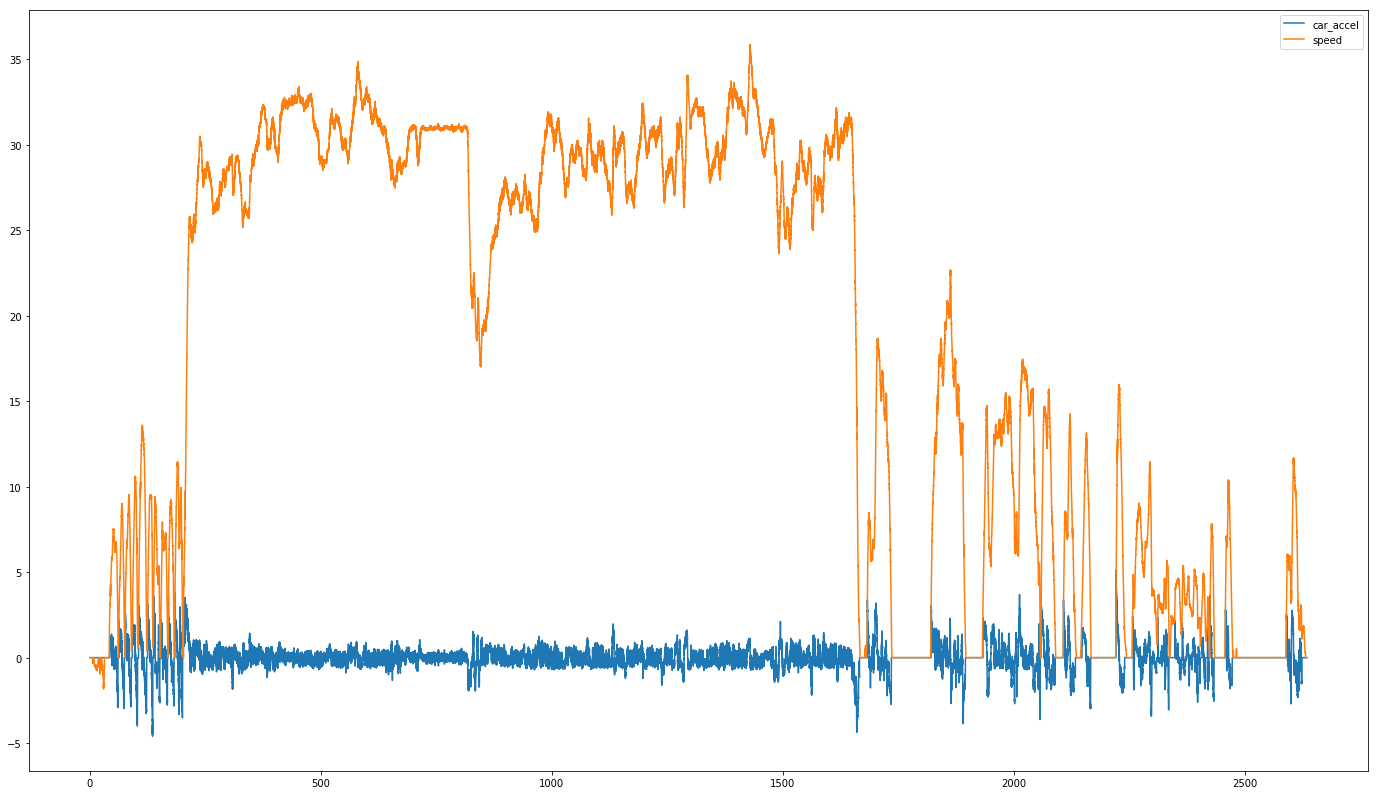

In [33]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
# plt.plot(sample.times, sample.rpm)
# plt.plot(sample.times, sample.car_accel * 3600 * 3600 / 1000)
# plt.plot(sample.times, sample.steering_angle / 100)
# plt.plot(sample.times, sample.fiber_compass_y * 100, c='g')
# plt.plot(sample.times, sample.brake_user / 100, c='g')
plt.plot(df1.times[limits[0]:limits[1]], df1.car_accel[limits[0]:limits[1]])
plt.plot(df1.times[limits[0]:limits[1]], df1.speed[limits[0]:limits[1]])
plt.legend()

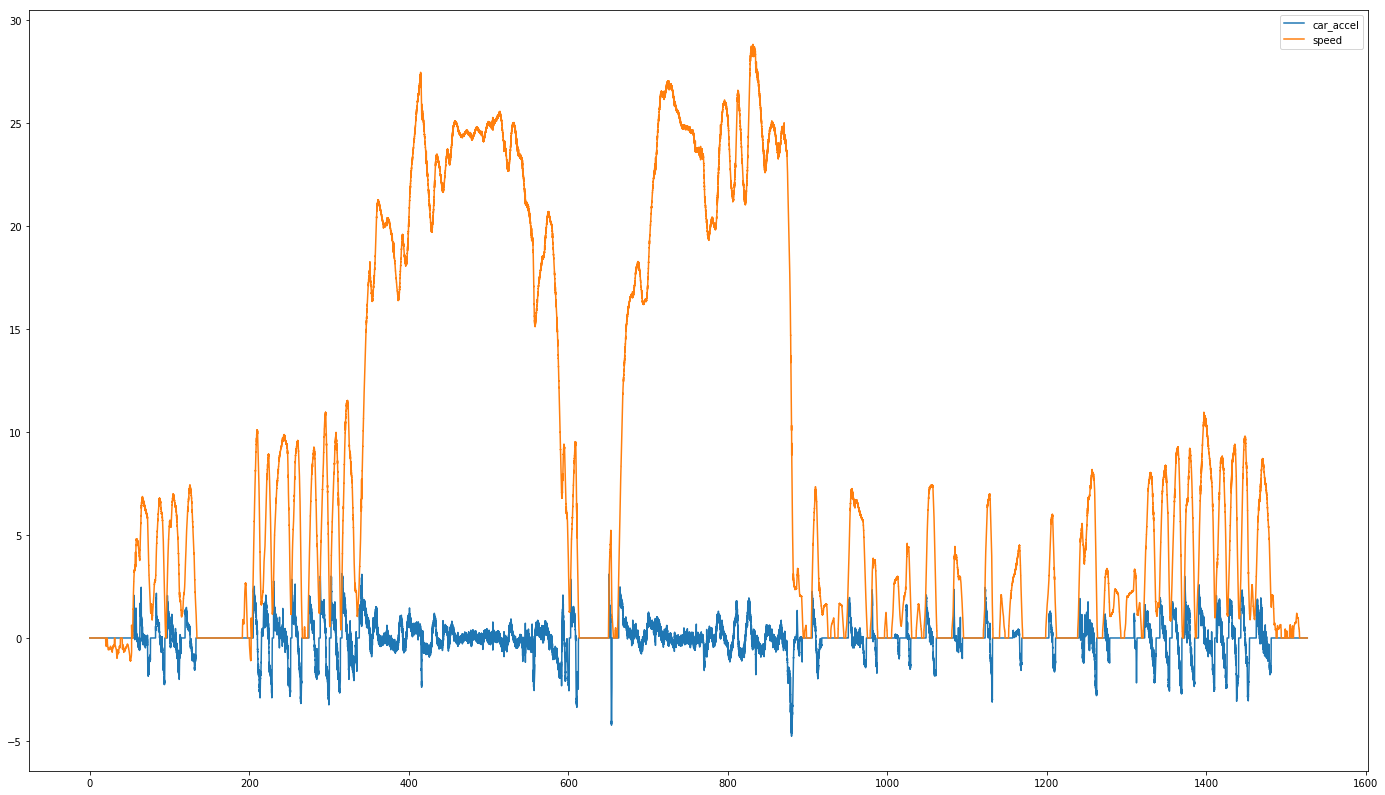

In [34]:
limits = (0, 500000)
plt.figure(figsize=(24,14))
plt.plot(df.times[limits[0]:limits[1]], df.car_accel[limits[0]:limits[1]])
plt.plot(df.times[limits[0]:limits[1]], df.speed[limits[0]:limits[1]])
plt.legend()

In [35]:
df2 = load_dataset_as_dataframe('data/2016-06-08--11-46-01.h5')
df2.head()

,blinker,brake,brake_computer,brake_user,cam1_ptr,car_accel,fiber_accel_0,fiber_accel_1,fiber_accel_2,fiber_compass_0,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,63872.0,0.0,63872.0,0.0,0.0,0.574711,-0.252197,9.756913,0.119573,...,799.000000,4074.000000,4077.000000,92.000000,791.000000,18.000000,87.000000,113.000000,24.000000,13.000000
1,0.0,63872.0,0.0,63872.0,0.0,0.0,0.583070,-0.243502,9.756204,0.119573,...,791.000000,4074.936776,4094.430986,94.000000,791.000000,11.000000,72.000000,114.000000,25.000000,12.000000
2,0.0,63872.0,0.0,63872.0,0.0,0.0,0.573968,-0.244439,9.766149,0.119573,...,792.111469,4074.622294,4085.622294,93.622294,785.510824,14.266237,89.356057,114.000000,26.000000,12.622294
3,0.0,63872.0,0.0,63872.0,0.0,0.0,0.585191,-0.252392,9.769888,0.119573,...,794.915611,4072.203135,4080.525016,92.440627,789.321881,13.762508,87.356238,111.678119,26.678119,10.881254
4,0.0,63872.0,0.0,63872.0,0.0,0.0,0.589399,-0.254389,9.770599,0.119926,...,794.813155,4073.582460,4079.417540,93.000000,789.208770,13.208770,82.142995,113.000000,24.813155,13.395615


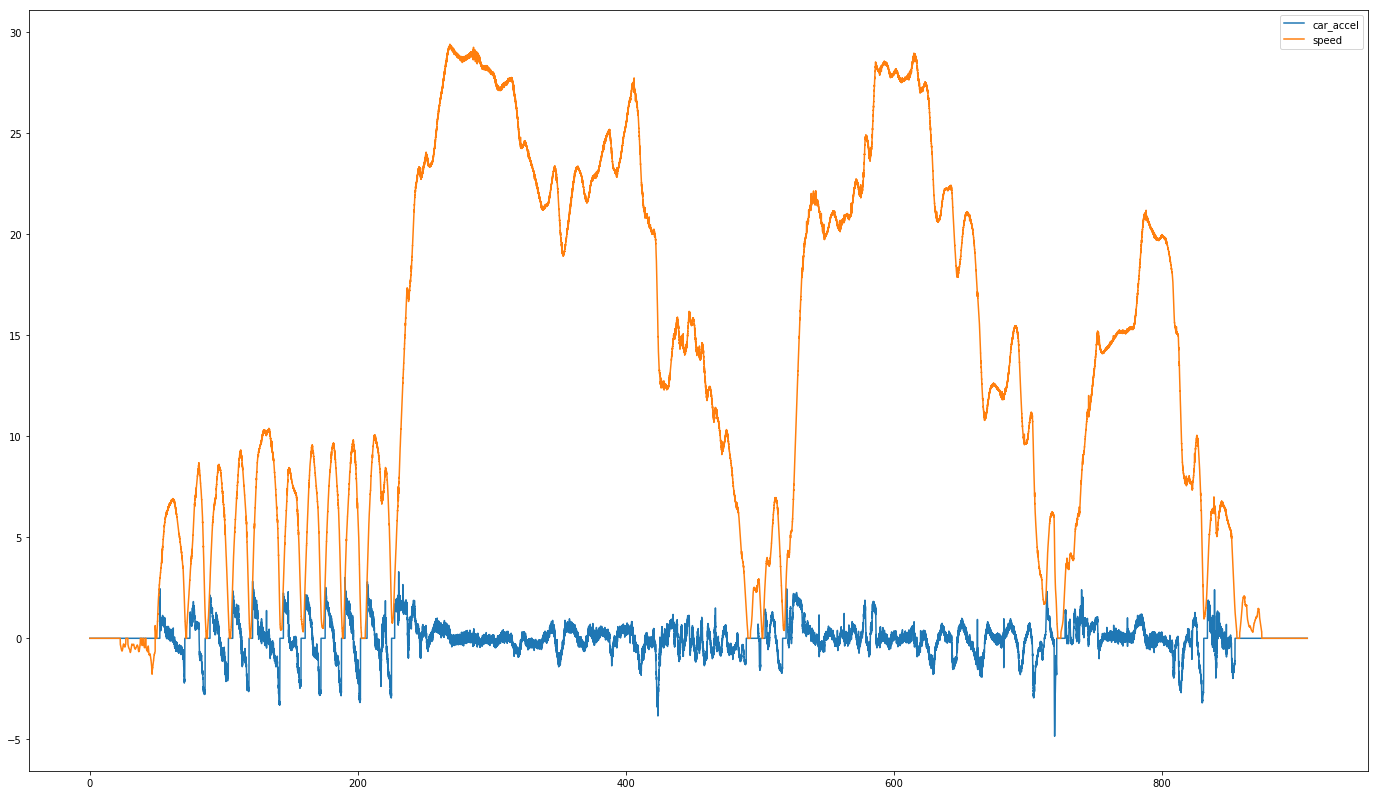

In [38]:
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df2.times[limits[0]:limits[1]], df2.car_accel[limits[0]:limits[1]])
plt.plot(df2.times[limits[0]:limits[1]], df2.speed[limits[0]:limits[1]])
plt.legend()

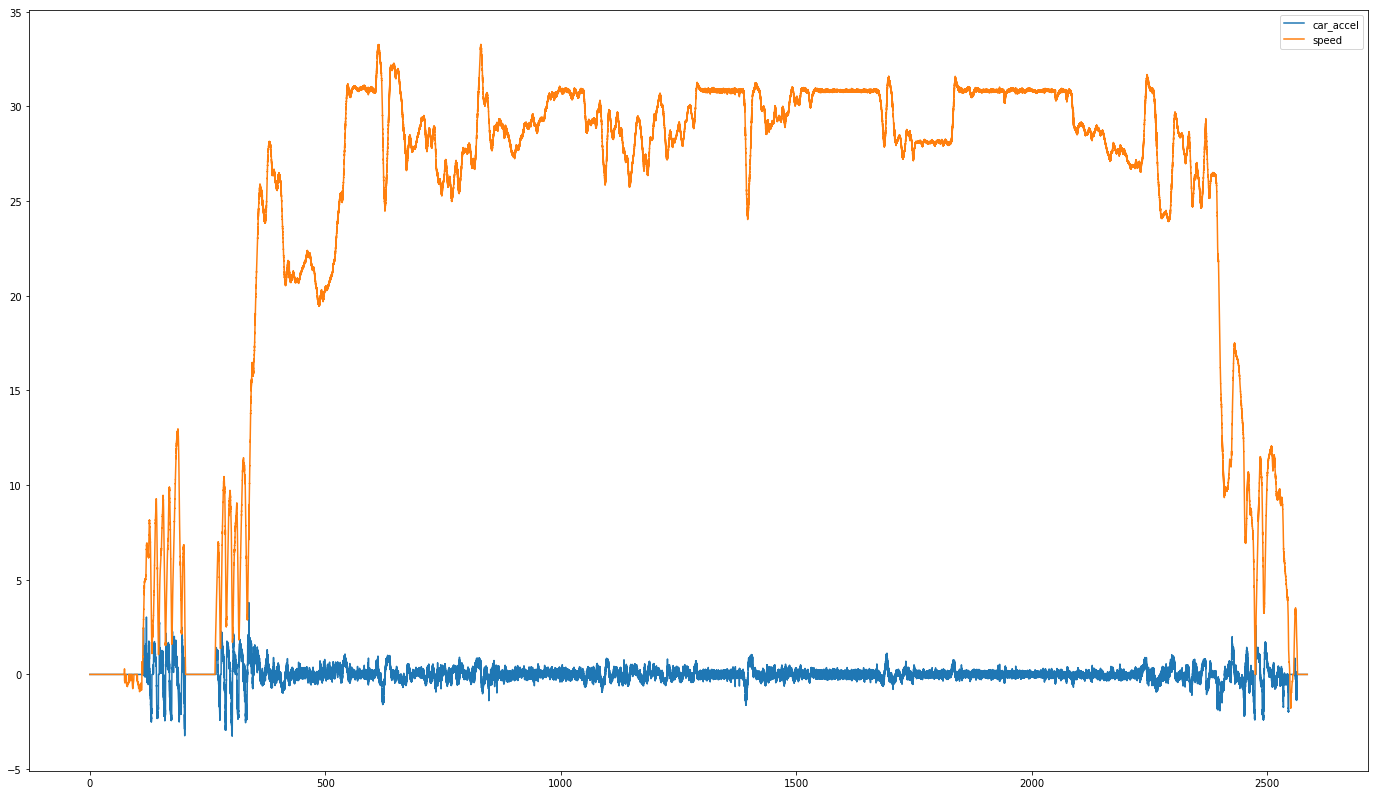

In [39]:
df3 = load_dataset_as_dataframe('data/2016-05-12--22-20-00.h5')
df3.head()
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df3.times[limits[0]:limits[1]], df3.car_accel[limits[0]:limits[1]])
plt.plot(df3.times[limits[0]:limits[1]], df3.speed[limits[0]:limits[1]])
plt.legend()

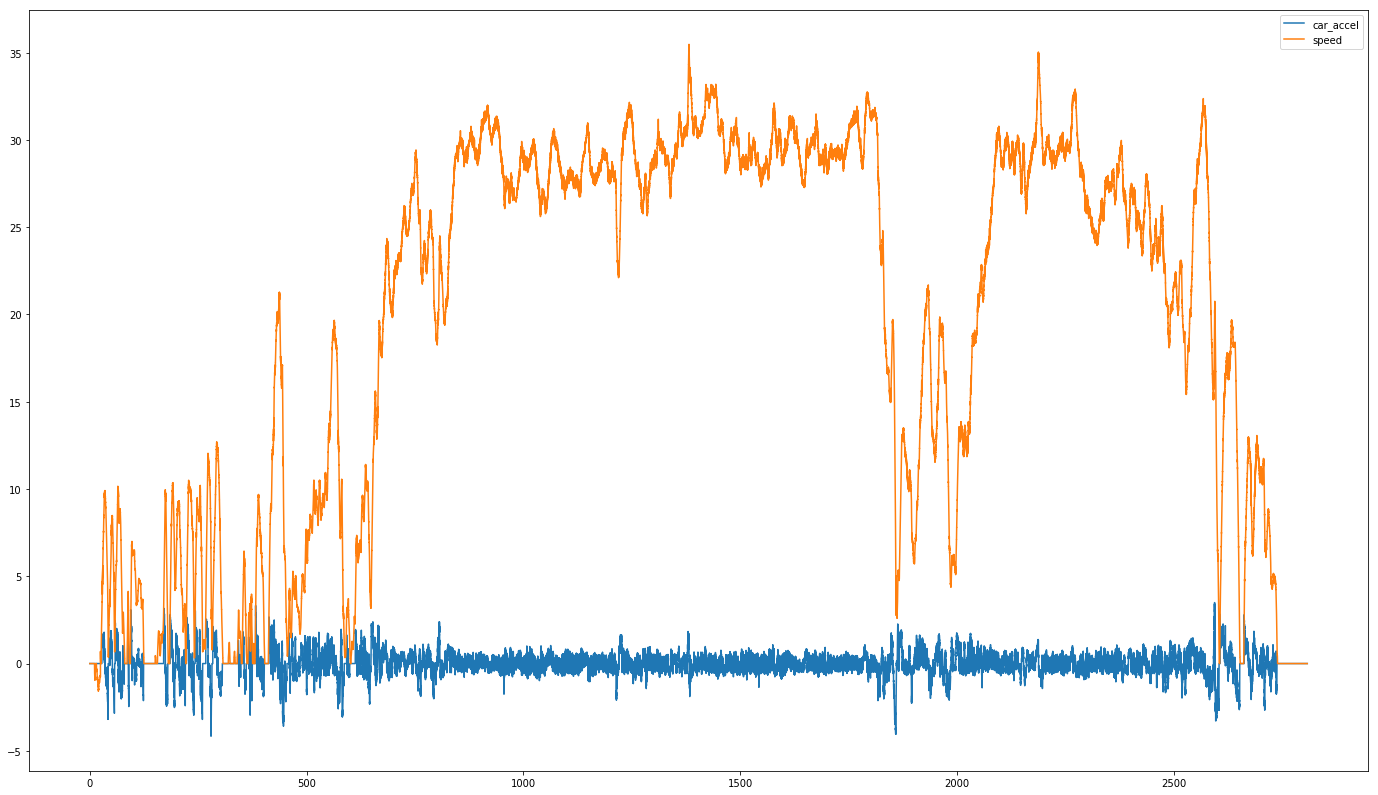

In [40]:
df4 = load_dataset_as_dataframe('data/2016-02-02--10-16-58.h5')
df4.head()
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
plt.legend()

In [83]:
sns.lineplot(df4.times, df4.speed_abs, hue=df4.car_accel)

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1195918c8> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x1195a2268> (for post_execute):


KeyboardInterrupt: 

In [66]:
brake_df = extract_brakes(df4, 100)
brake_df.head()

# brake_df.head()
# limits = (0, 5000000)
# plt.figure(figsize=(24,14))
# plt.plot(brake_df.times[limits[0]:limits[1]], brake_df.speed[limits[0]:limits[1]])
# # plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
# # plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
# plt.legend()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
brake_df[99:30000]

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
brake_df.count(), df4.count()

(blinker               0
 brake                 0
 brake_computer        0
 brake_user            0
 cam1_ptr              0
 cam2_ptr              0
 camphone_ptr          0
 car_accel             0
 fiber_accel_0         0
 fiber_accel_1         0
 fiber_accel_2         0
 fiber_compass_0       0
 fiber_compass_1       0
 fiber_compass_2       0
 fiber_compass_x       0
 fiber_compass_y       0
 fiber_compass_z       0
 fiber_gyro_0          0
 fiber_gyro_1          0
 fiber_gyro_2          0
 fiber_temperature     0
 gas                   0
 gear_choice           0
 gps_1_fix             0
 gps_1_pos_0           0
 gps_1_pos_1           0
 gps_1_pos_2           0
 gps_1_vel_0           0
 gps_1_vel_1           0
 gps_1_vel_2           0
                      ..
 rpm                   0
 rpm_post_torque       0
 selfdrive             0
 speed                 0
 speed_abs             0
 speed_fl              0
 speed_fr              0
 speed_rl              0
 speed_rr              0


In [54]:
brake_df[:200]

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
3446,4.0,656.000000,0.0,656.000000,682.0,680.0,995.153004,-0.043913,-0.541388,-1.572500,...,110.772012,169.862561,171.908200,42.902470,118.780244,130.991768,77.813171,70.300823,150.901219,116.795457
3447,4.0,656.000000,0.0,656.000000,682.0,681.0,995.431347,-0.023548,-0.021580,0.474648,...,150.352584,26.754460,73.035019,44.249108,108.345448,194.822255,89.519625,69.249108,196.010704,36.665257
3454,4.0,672.000000,0.0,672.000000,684.0,682.0,997.487960,-0.235968,-0.221724,-1.137396,...,67.642052,114.860280,19.449767,42.930140,45.030606,176.968712,93.069860,70.689953,164.489020,76.210262
3455,4.0,672.000000,0.0,672.000000,684.0,682.0,997.765985,-0.305423,-1.397654,-0.799764,...,142.699076,120.071234,88.583905,43.000000,190.852203,212.928766,91.868842,70.289614,129.087222,157.891462
3456,4.0,672.000000,0.0,672.000000,684.0,682.0,998.049497,-0.075533,-1.751861,0.055804,...,184.148425,111.421965,17.757039,43.792840,215.191871,239.813351,86.242961,68.414320,138.163715,237.235316
3464,4.0,718.154581,0.0,718.154581,686.0,684.0,1000.489544,-0.109040,-0.688229,-1.907749,...,97.144407,143.956209,241.098947,44.340632,78.837036,39.715359,75.978105,72.000000,94.615577,221.965905
3465,4.0,720.000000,0.0,720.000000,686.0,684.0,1000.767300,-0.072319,-0.719578,-0.480017,...,98.754318,47.169890,246.308842,43.197474,90.779582,220.389275,92.926527,70.197474,209.868007,243.592421
3468,4.0,733.673334,0.0,733.673334,686.0,685.0,1001.676007,-0.134347,-1.870854,-0.670101,...,141.886812,207.679506,142.909159,42.419876,156.168788,211.993822,102.022348,70.419876,50.000000,191.590116
3469,4.0,736.000000,0.0,736.000000,687.0,685.0,1001.988653,-0.070133,-1.263467,-1.245178,...,152.217090,222.285075,250.416282,44.298643,160.895786,55.900548,92.479648,70.298643,67.615329,63.393764
3472,4.0,749.953746,0.0,749.953746,687.0,686.0,1002.823732,-0.109601,-0.916630,-1.293234,...,31.278133,151.411566,210.416445,44.000000,36.948554,38.371386,83.525723,70.175241,129.692952,41.546626


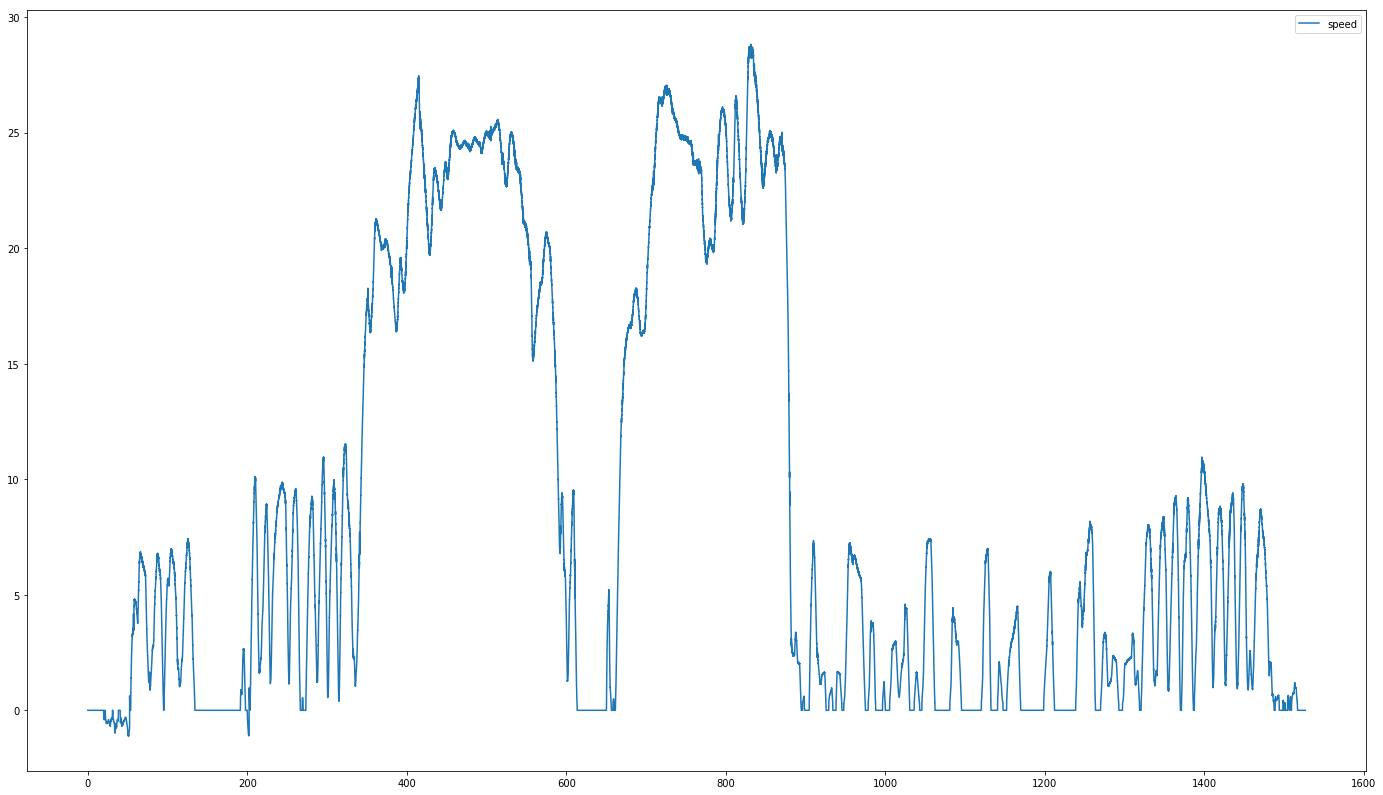

In [56]:
limits = (0, 5000000)
plt.figure(figsize=(24,14))
plt.plot(df.times[limits[0]:limits[1]], df.speed[limits[0]:limits[1]])
# plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
# plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
plt.legend()

In [100]:
df = pd.DataFrame({'B': [0, 1, 2, np.nan, 4], 'A': [1, 1, 2, np.nan, 4]})
df.expanding(3).mean()

,B,A
0,NaN,NaN
1,NaN,NaN
2,1.00,1.333333
3,1.00,1.333333
4,1.75,2.000000


In [101]:
ext_df = df1[:10000]
ext_df.head()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.313100,-0.047527,...,28.000000,228.000000,3.000000,236.000000,14.000000,22.000000,90.000000,250.000000,31.000000,17.000000
1,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.619745,-0.111516,...,23.074187,226.358062,3.000000,236.820969,18.925813,19.537094,99.851625,247.537094,35.925813,15.358062
2,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.589704,-0.088468,...,23.134382,228.798428,232.471064,236.798428,20.865618,18.865618,116.134382,246.134382,34.000000,14.932809
3,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.594371,-0.097445,...,25.895667,231.895667,252.860890,236.034778,18.104333,15.069555,121.069555,250.000000,33.034778,12.965222
4,0.0,63872.0,0.0,63872.0,0.0,0.0,0.0,0.0,0.612610,-0.128938,...,23.229115,226.458231,25.787456,236.000000,21.694513,15.923628,126.778052,247.152744,34.229115,13.000000


In [102]:
ext_df.expanding(100).mean()

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


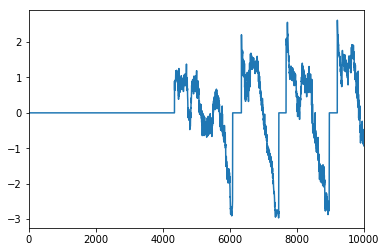

In [87]:
ext_df.dropna().car_accel.plot()

In [148]:
test_df = extract_brakes(df1, 100)
# test_df.car_accel.plot()

In [149]:
test_df.speed.tail()

263100    18.503317
263200    18.496390
263300    18.489366
263400    18.482346
263500    18.475332
Name: speed, dtype: float64

In [150]:
df1.speed.tail()

263578    0.0
263579    0.0
263580    0.0
263581    0.0
263582    0.0
Name: speed, dtype: float64

In [151]:
df1.index

RangeIndex(start=0, stop=263583, step=1)

In [ ]:
limits = (0, 5000000)
plt.figure(figsize=(30,15))
sns.scatterplot(x=test_df.index, y=test_df.speed)
# sns.scatterplot(x=df1.index, y=df1.speed)
# plt.scatter(test_df.times[0:-1], test_df.speed[-10:-1])
# plt.plot(df1.times[100:], df1.speed[100:])
# plt.plot(df4.times[limits[0]:limits[1]], df4.car_accel[limits[0]:limits[1]])
# plt.plot(df4.times[limits[0]:limits[1]], df4.speed[limits[0]:limits[1]])
plt.legend()

In [94]:
len(test_df)

263583

In [97]:
test_df[50:60]

,blinker,brake,brake_computer,brake_user,cam1_ptr,cam2_ptr,camphone_ptr,car_accel,fiber_accel_0,fiber_accel_1,...,velodyne_imu_2,velodyne_imu_3,velodyne_imu_4,velodyne_imu_5,velodyne_imu_6,velodyne_imu_7,velodyne_imu_8,velodyne_imu_9,velodyne_imu_10,velodyne_imu_11
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
